<a href="https://colab.research.google.com/github/gloverthe/Python-Baseball/blob/master/yet_another_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summative Assessment - Programming For Data and Analytics**
<details>
<summary>Part 1 Business Problem (40%)</summary>


BPP Telecom, a leading telecommunications provider headquartered in the UK, has been on a
progressive journey, expanding its offerings from traditional phone services to a broad spectrum
encompassing high-speed internet and cutting-edge streaming services. However, despite the
diversification and growth of its services, BPP has been encountering a rising tide of customer
churn. This escalating issue has begun to erode its customer base and revenues, posing a clear
constraint to the company's future growth trajectory.

    
Understanding the urgency of the situation, BPP Telecom has diligently accumulated a wealth of
customer information. This rich dataset captures an array of attributes for each customer, ranging
from demographics to service usage and charges. The churn status of each customer is denoted as
"Yes" or "No," providing an essential label for predictive modelling.
As a proficient data analyst with an aptitude for programming, your mission is to delve into this
dataset, extract invaluable insights, and ultimately construct a predictive model to anticipate
customer churn. The deliverable of your assignment will be an interactive Python notebook that
transparently and accessibly presents your methodology, findings, and conclusions. The two files
provided by the DBA are:  

• A file in PDF format called ‘bpp_customer_churn.pdf’  
• An Excel file, called ‘bpp_churn_data.xlsx’  

</details>





<details>
<summary>Click to expand/collapse</summary>

This is a collapsible Markdown cell.

You can put any content here, including text, lists, images, etc.

</details>

<details>
<summary style="font-size: 16px; font-weight: bold; font-style: italic;">Click to expand/collapse</summary>

This is a collapsible Markdown cell.

You can put any content here, including text, lists, images, etc.

</details>


<details>
<summary>Contents</summary>

* Overview of approach
* Environment Setup
* Import dependencies
    * Decorators
* Initialise Project Variables
* Data Ingestion:
    * PDF file
    * Excel file
* Data Validation
* Exploratory Data Analysis (EDA)
* Pre-model algorithms
* Churn Prediction Modeling and Testing
* Evaluation
* Next Steps

</details>






# Project Setup

## Creating Virtual Environment
<details>
<summary>Initial Environment Setup</summary>

When working with Python it is best practice to create a Virtual Environment or 'Venv'.  

This keeps any dependencies that are installed separate from the base python install.  It also makes it easy to keep versions of dependencies constant for the current project whilst not affecting the versions used by other projects.

More information can be found here : https://docs.python.org/3/library/venv.html

The command in the cell below creates a venv in the current directory.

Once installed the venv will need to be selected as the kernel for the workbook before proceeding.

</details>




In [115]:
# Uses '!' to push commands out to the Operation Systems (os) and create the venv
# uncomment to run if needed
# !python3 -m venv venv
# !source venv/bin/activate

<details>
<summary>Installing Dependencies</summary>

Libraries that will be used for this project are not core to python and will need to be installed using pip.  This can be done using a requirements.txt file or by pushing out shell commands from the note book by inserting an exclamation mark before the command (as above)

</details>



In [116]:
# Uses '!' to push commands out to the Operation Systems (os) and install the packages
!pip install pandas
!pip install tabula-py
!pip install tabula-py[jpype]
!pip install pdfplumber
!pip install opencv-python
!pip install plotly
!pip install ipywidgets
!pip install tabulate
!pip install camelot-py
!pip install cv2-tools
!pip install scipy
!pip install bokeh
!pip install seaborn
!pip install matplotlib

<details>
<summary>Decorators</summary>

Python Decorators allow you to add additional functionality to objects without modifying their structure.
https://www.datacamp.com/tutorial/decorators-python

A useful decorator is one that allows you to easily print the execution time of functions.  This is declared below and then can be applied using @timeit above any function definition.

</details>



In [117]:
# Creates a decorator function
import time

# Credit for this goes to : https://www.w3resource.com/python-exercises/decorator/python-decorator-exercise-2.php

def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Function {func.__name__} took {execution_time:.4f} seconds to execute")
        return result
    return wrapper

## Importing Dependencies
<details>
<summary>Import packages</summary>

Before the packages can be used the must be loaded to memory using the import statement

Some most of the packages will be imported here , but additional ones will be imported later for modelling and visualisation

</details>

In [118]:
# It is common practice to import dependencies at the top of a notebook.
# However some specific dependencies will be imported in cells
import numpy as np

import os # 'os' is useful for making projects run on Linux/Windows/Mac and pushing out shell command

import pandas as pd # allows for 'in memory' spreadsheets for data manipulation
import tabula #  used to import pdfs
from tabula.io import read_pdf #  used to import pdfs
import pdfplumber #  used to import pdfs - alternate library


import seaborn as sns # used for visualisations
import matplotlib.pyplot as plt # used for visualisations

## Intialising Varables
<details>
<summary>Pipeline wide Variables</summary>

Key variables are declared here that will be used throughout the process

</details>

In [119]:
# Declare constants used through out the project - if these are constants and should be treated as immutable it is best practice to have these capitalised

DATA_PATH = 'data'

CHURN_PDF = 'bpp_churn_data.pdf'
CHURN_EXCEL = 'bpp_churn_data.xlsx'

# Create full file references to the files using os.path

CHURN_PDF_IMPORT_PATH = os.path.join(DATA_PATH, CHURN_PDF)
CHURN_EXCEL_IMPORT_PATH = os.path.join(DATA_PATH, CHURN_EXCEL)

print(f"Churn PDF will be imported from: {CHURN_PDF_IMPORT_PATH}")
print(f"Churn Excel will be imported from: {CHURN_EXCEL_IMPORT_PATH}")


# These formats are defined here to be used later in the process

DESIRED_FORMATS = {
    'customerid': str,
    'gender': str,
    'seniorcitizen': int,
    'partner': str,
    'dependents': str,
    'tenure': int,
    'phoneservice': str,
    'multiplelines': str,
    'internetservice': str,
    'onlinesecurity': str,
    'onlinebackup': str,
    'deviceprotection': str,
    'techsupport': str,
    'streamingtv': str,
    'streamingmovies': str,
    'contract': str,
    'paperlessbilling': str,
    'paymentmethod': str,
    'monthlycharges': float,
    'totalcharges': float,
    'churn': str
}

Churn PDF will be imported from: data/bpp_churn_data.pdf
Churn Excel will be imported from: data/bpp_churn_data.xlsx


# Importing the Data


<details>
<summary>Importing a PDF</summary>

Importing PDFs is problematic and 2 different methods are compared below.

The first is using tabular and the second is using pdfplumber.

**Tabular** returns a list of Dataframes, one for each page, and as only the first DataFrame contains the header this is extracted then added to each Dataframe before concantetnating.

Credit for this solution : https://stackoverflow.com/questions/65626278/using-tabula-py-to-read-table-without-header-from-pdf-format

**PDFplumber** parses through pages extracting rows, appending these to a list then creates a DataFrmae from them.

The timeit decorator is used on the execution of both functions.  This shows that Tabular is around 3 times faster than pdfplumber.  Although this is only a 7 Second difference on small datasets, this could be significant if the pdf contained millions of rows.  

As a result the Tabular function will be used.  However Tabula can be difficult to install, so the pdfplumber function is available also.

</details>




In [120]:



# Import the pdf into a dataframe using tabula and view it

@timeit
def import_pdf_to_df(path_to_file: str, print_shape:bool=True)->pd.DataFrame:
    """

    Uses Tablular

    Designed to read in the Churn PDF and process into a DataFrame

    Uses list comprehension to iterate through the list of pages and then
    joins them into one DataFrame.

    Assumes the headers are only on the first page

    Args:
        path_to_file (str): full path name to the file, including filename
        print_shape(bool): Defaults to True.  Uses df.shape to print the number of rows and columns

    Returns:
        pd.DataFrame: The PDF as a Pandas DataFrame
    """

    churn_pdf_df_list = (read_pdf(path_to_file,
                                         pages='all',
                                         multiple_tables=True,
                                         lattice=True,
                                         pandas_options={'header': None} )
                         )

    churn_pdf_df_columns = churn_pdf_df_list[0].values.tolist()[0]

    churn_pdf_df_list[0] = churn_pdf_df_list[0].iloc[1:]

    for df in churn_pdf_df_list: df.columns = churn_pdf_df_columns

    frames = [f for f in churn_pdf_df_list]

    result = pd.concat(frames)
    df_shape = result.shape
    if print_shape:
        print(f'The Dataframe from a PDF has {df_shape[0]} rows, and {df_shape[1]} columns')
    return result



# print(df.describe)


In [121]:


@timeit
def import_pdf_to_df_pp(path_to_file: str, print_shape:bool=True)->pd.DataFrame:
    """
    Uses pdfplumber

    Designed to read in the Churn PDF and process into a DataFrame

    Uses loops to parse through the pdfs.

    Assumes the headers are only on the first page

    Args:
        path_to_file (str): full path name to the file, including filename
        print_shape(bool): Defaults to True.  Uses df.shape to print the number of rows and columns

    Returns:
        pd.DataFrame: The PDF as a Pandas DataFrame
    """
    all_tables = []
    column_names = None

    with pdfplumber.open(path_to_file) as pdf:
        for i, page in enumerate(pdf.pages):
            tables = page.extract_tables()
            if i == 0 and tables:
                column_names = tables[0][0]
                all_tables.extend(tables[0][1:])
            elif i > 0 and tables:
                for table in tables:
                    all_tables.extend(table)

    if all_tables and column_names:
        result = pd.DataFrame(all_tables, columns=column_names)
    else:
        print('No data from pdf')

    df_shape = result.shape
    if print_shape:
            print(f'The Dataframe from a PDF has {df_shape[0]} rows, and {df_shape[1]} columns')
    return result

# pp_churn_pdf_df = import_pdf_to_df_pp(path_to_file=CHURN_PDF_IMPORT_PATH)


<details>
<summary>Excel import</summary>

Importing an Excel is more straight forward, and Pandas has a function specifically designed to import Excel files.  This is pd.read_excel.

Although Excel files are ok for adhoc analysis, if this model was to be put into production the recommendation would be that Python pulled the data directly from a database, or read in csv files that were dumped from the database on a schedule.

Although there is a function to import an Excel to a Pandas DataFrame i have wrapped the import steps in a another function so it can be standardised into the same format as the PDF import.

</details>

###




In [122]:

@timeit
def import_xl_to_df(path_to_file: str, print_shape:bool=True)->pd.DataFrame:
    """
    Imports a excel file to a DataFrame

    Args:
        path_to_file (str): full path name to the file, including filename
        print_shape (bool): Defaults to True.  Uses df.shape to print the number of rows and columns

    Returns:
        pd.DataFrame: The Excel as a Pandas DataFrame
    """
    churn_xl_df = pd.read_excel(path_to_file)
    if print_shape:
        xl_df_shape = churn_xl_df.shape
        print(f'The Dataframe from Excel has {xl_df_shape[0]} rows, and {xl_df_shape[1]} columns')
    return churn_xl_df


In [123]:
tab_churn_pdf_df = import_pdf_to_df(path_to_file=CHURN_PDF_IMPORT_PATH)
churn_xl_df = import_xl_to_df(path_to_file=CHURN_EXCEL_IMPORT_PATH)


# print(tab_churn_pdf_df.dtypes)
# print(churn_xl_df.dtypes)

The Dataframe from a PDF has 1643 rows, and 21 columns
Function import_pdf_to_df took 13.7011 seconds to execute
The Dataframe from Excel has 4900 rows, and 21 columns
Function import_xl_to_df took 4.0878 seconds to execute


To make the DataFrames easier to work with all the column names will be converted to lower case as currently the is some inconsistency in the names

In [124]:

@timeit
def standardise_column_names(df: pd.DataFrame)->pd.DataFrame:
  """Converts all the column names in a dataframe to lowercase and removes spaces/non standard
  characters if any are present

  Args:
    df: The DataFrame to modify.

  Returns:
    A new DataFrame with the column names in lowercase and spaces removed
  """

  bad_column_chars = r')(*%$£!+=\][])'
  replace_with_underscore = ' -'

  for char in bad_column_chars:
    df.columns = df.columns.str.replace(char, '', regex=False)

  for char in replace_with_underscore:
    df.columns = df.columns.str.replace(char, '_', regex=False)

  return df.rename(columns=str.lower)

In [125]:
# Standardise the column names and print them
tab_churn_pdf_df = standardise_column_names(tab_churn_pdf_df)
churn_xl_df = standardise_column_names(churn_xl_df)

print(f'Columns in the data from the PDF: \n{tab_churn_pdf_df.dtypes}\n')

print(f'Columns in the data from the Excel: \n{churn_xl_df.dtypes}\n')

Function standardise_column_names took 0.0225 seconds to execute
Function standardise_column_names took 0.0142 seconds to execute
Columns in the data from the PDF: 
customerid          object
gender              object
seniorcitizen       object
partner             object
dependents          object
tenure              object
phoneservice        object
multiplelines       object
internetservice     object
onlinesecurity      object
onlinebackup        object
deviceprotection    object
techsupport         object
streamingtv         object
streamingmovies     object
contract            object
paperlessbilling    object
paymentmethod       object
monthlycharges      object
totalcharges        object
churn               object
dtype: object

Columns in the data from the Excel: 
customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines       

## Data Validation
<details>
<summary>Summary of the steps</summary>

Pre Merge:

* Check that the number of records in the DataFrames matches the expected number from the files
* Check that the column names are the same in both DataFrames
* Check the the format/data types of the columns is the same in both DataFrames
* Check for null/missing Values - treat if required


Post Merge
* Check that there are no duplicate records in the DataFrame
* Check that there are no duplicate customer IDs in the DataFrame
* Check for outliers


</details>







In [126]:
# Check the column names and formats are the same:
# read the column names and formats from the data frames into lists and compare the lists


@timeit
def compare_data_frames(df1:pd.DataFrame, df2:pd.DataFrame)->None:
    """Compares the following between to DataFrames:
        - Checks that the number of columns are the same
        - Checks that all the columns are named the same
        - Checks that the datatypes are the same

    Raises:
        ValueError: Raises an error if the number of columns in the DataFrames are different
        or
        The number of columns is the same but the name/types of the columns is different

    Args:
        df1 (pd.DataFrame): First DataFrame for comparison
        df2 (pd.DataFrame): Second DataFrame for comparison
    """

    dtype_pass = False
    column_pass = False

    # add the column names and datatype to zipped lists
    df1_columns = zip(df1.columns.tolist(), df1.dtypes.tolist())
    df2_columns = zip(df2.columns.tolist(), df2.dtypes.tolist())

    # Sort the 2 zipped lists on the column names
    df1_columns = sorted(df1_columns, key=lambda x: x[0])
    df2_columns = sorted(df2_columns, key=lambda x: x[0])


    print(f'Columns and Datatypes in the 1st DataFrame are: \n {df1_columns}')
    print(f'Columns and Datatypes in the 2nd DataFrame are: \n {df2_columns}')
    print()

    # Get the lengths of list to get the number of columns
    len_df1_cols = len(list(df1_columns))
    len_df2_cols = len(list(df2_columns))

    # df1_dtypes = df1.dtypes.tolist()
    # df2_dtypes = df2.dtypes.tolist()

    # Iterate through the list comparing the column names and data types
    if len_df1_cols == len_df2_cols:
        column_name_counter = 0
        dtype_counter = 0
        for i in range(len_df1_cols):
            if df1_columns[i][0] == df2_columns[i][0]:
                column_name_counter += 1
            else:
                print(f"Column : {df1_columns[i][0]} name, differs from column : {df2_columns[i][0]}")
            if df1_columns[i][1] == df2_columns[i][1]:
                dtype_counter += 1
            else:
                print(f"Column : {df1_columns[i][0] } datatype of {df1_columns[i][1]}, differs from column : {df2_columns[i][0]} of {df2_columns[i][1]}")

    else:
        raise ValueError(f"The first DataFrame has {str(len_df1_cols)} and the second DataFrame has {len_df2_cols}")

    # review the results of the matching and flag if there are any issues
    if column_name_counter == len_df1_cols:
        column_pass = True
    if dtype_counter == len_df1_cols:
        dtype_pass = True
    if column_pass and dtype_pass:
        print("PASSED TEST!!! : Column names and data types are the same for the DataFrames")
    else:
        raise ValueError('DataFrames are not the same - see output for details')



In [127]:
# Run the function to compare the 2 DataFrames

# Running the function on the 2 dataframes raises the values error
# Uncomment to see the error
# compare_data_frames(df1=tab_churn_pdf_df, df2=churn_xl_df)

## Column Value Analysis
<details>
<summary>Data Format Validation</summary>



The positive result of the step above is that the number of columns and the headings are the same across both datasets.  However the tests on the DataFrames indicate that there are some issues with the Datatypes. These could be fixed by reviewing the columns and explicitly defining the formats of the columns.

Upon reviewing the data in the 2 input datasets and the original brief, the following formats could be applied to the columns:

| **Column Name**  | **Format** | **Description**                                                                                                                           |   |   |
|------------------|------------|-------------------------------------------------------------------------------------------------------------------------------------------|---|---|
| CustomerID       | String     |  A unique identifier assigned to   each customer.                                                                                         |   |   |
| Gender           | String     |  The gender of the customer (Male   or Female).                                                                                           |   |   |
| SeniorCitizen    | Integer    |  A binary indicator representing   whether the customer is a senior citizen or not (1 for senior citizens, 0 for   non-senior citizens).  |   |   |
| Partner          | String     |  Indicates whether the customer has   a partner (Yes or No).                                                                              |   |   |
| Dependents       | String     |  Indicates whether the customer has   dependents (Yes or No).                                                                             |   |   |
| Tenure           | Integer    |  The total amount of months the   customer has been with the company.                                                                     |   |   |
| PhoneService     | String     |  Indicates whether the customer has   a phone service or not (Yes or No).                                                                 |   |   |
| MultipleLines    | String     |  Indicates whether the customer has   multiple lines or not (Yes, No, or No phone service).                                               |   |   |
| InternetService  | String     |  The customer's type of internet   service (DSL, Fiber optic, or No).                                                                     |   |   |
| OnlineSecurity   | String     |  Indicates whether the customer has   online security or not (Yes, No, or No internet service).                                           |   |   |
| OnlineBackup     | String     |  Indicates whether the customer has   online backup or not (Yes, No, or No internet service).                                             |   |   |
| DeviceProtection | String     |  Indicates whether the customer has   device protection or not (Yes, No, or No internet service).                                         |   |   |
| TechSupport      | String     |  Indicates whether the customer has   tech support or not (Yes, No, or No internet service).                                              |   |   |
| StreamingTV      | String     |  Indicates whether the customer has   streaming TV or not (Yes, No, or No internet service).                                              |   |   |
| StreamingMovies  | String     |  Indicates whether the customer has   streaming movies or not (Yes, No, or No internet service).                                          |   |   |
| Contract         | String     |  The contract term of the customer   (Month-to-month, One year, Two years).                                                               |   |   |
| PaperlessBilling | String     |  Indicates whether the customer has   paperless billing or not (Yes or No).                                                               |   |   |
| PaymentMethod    | String     |  The customer's payment method   (Electronic check, Mailed check, Bank transfer (automatic), Credit card   (automatic)).                  |   |   |
| MonthlyCharges   | Decimal    |  The amount charged to the customer   monthly.                                                                                            |   |   |
| TotalCharges     | Decimal    |  The total amount charged to the   customer.                                                                                              |   |   |
| Churn            | String     |  Whether the customer churned or   not (Yes or No)                                                                                        |   |   |


To Validate this a function has been created to check the values in all of the columns if the DataFrame.

The function will:
    * check for missing/null values in the DataFrame
    * For each column print the values and counts of values if the number of distinct values is less than 5
    * If the number of distinct values is greater than 5 print the min/max/average (if possible)


</details>


In [128]:
from re import L

from tabulate import tabulate


@timeit
def analyze_dataframe(df: pd.DataFrame,
                      columns_to_check: list=None,
                      dupe_columns_check: list=None
                      )->None:
    """Review the values in a DataFrame checking:

    * For missing/null values in the DataFrame
    * For each column print the values and counts of values if the number of distinct values is less than 5
    * If the number of distinct values is greater than 5 print the min/max/average (if possible)

    Args:
        df (pd.DataFrame): DataFrame to analyze
        columns_to_check (list): If required, a list of columns in the DataFrame can be specified.
                                Defaults to None, which means all columns will be analyzed
        dupe_columns_check (list): Check specific columns for duplicates, Defaults to None (meaning no columns will be checked)
    """


    if columns_to_check != None:
        # if columns to check is passed in create a specific list
        columns_list = columns_to_check
    else:
        # otherwise check all columns
        columns_list = df.columns

    # Check for null or missing values
    null_columns = df.columns[df.isnull().any()]
    if len(null_columns) > 0:
        print("*  The following columns have null or missing values:")
        for col in null_columns:
            if col in columns_list:
                print(f"    - {col}")
    else:
        print("* There are no null or missing values in the DataFrame.")
        print()

    # Check for duplicate rows
    if df.duplicated().any():
        print("*  Duplicates rows found in the DataFrame.")
    else:
        print("*  No duplicate rows found in the DataFrame")

    # check specific_columns for dupes
    if dupe_columns_check != None:
        for col in dupe_columns_check:
            if df.duplicated(subset=[col]).any():
                print(f"*  Duplicates found in the {col} column.")
            else:
                print(f"*  No duplicates found in the {col} column")


    # Create a list to store table data
    table_data = []


    # Iterate over columns
    for column in columns_list:
        try:
            unique_values = df[column].value_counts()
            num_unique_values = len(unique_values)
        except ValueError:
            unique_values = {'error': 0}
            num_unique_values = 0

        column_info = []

        column_info.append(f"{column}")

        # Check number of distinct values
        if num_unique_values > 5:
            # Add summary statistics to the table data
            column_info.append(f"NDV: {num_unique_values}, (greater than 5)")

            try:
                column_info.append(f"Min: {df[column].min()}")
            except TypeError:
                column_info.append("Min: Cannot Calculate due to Type")

            try:
                column_info.append(f"Max: {df[column].max()}")
            except TypeError:
                column_info.append("Max: Cannot Calculate due to Type")

            try:
                column_info.append(f"Avg: {df[column].mean()}")
            except TypeError:
                column_info.append("Avg: Cannot Calculate due to Type")
        else:

        # Add distinct values and counts to the table data
            column_info.append("Counts by value:")
            for value, count in unique_values.items():
                column_info.append(f"{value}: {count}")


        table_data.append(column_info)
    print()
    print('NDV : Number of distinct Values')
    print('If NDV > 5 values will not be printed')
    print()
    # Print the table
    print(tabulate(table_data, headers=['Column', '', '', '', '', '', ''], tablefmt='github'))  # Change tablefmt as needed



In [129]:
# run the function on the first DataFrame

# analyze_dataframe(tab_churn_pdf_df, columns_to_check=['totalcharges'])
analyze_dataframe(tab_churn_pdf_df, dupe_columns_check=['customerid'])



*  The following columns have null or missing values:
    - totalcharges
*  No duplicate rows found in the DataFrame
*  No duplicates found in the customerid column

NDV : Number of distinct Values
If NDV > 5 values will not be printed

| Column           |                             |                                   |                                   |                                   |                              |
|------------------|-----------------------------|-----------------------------------|-----------------------------------|-----------------------------------|------------------------------|
| customerid       | NDV: 1643, (greater than 5) | Min: 0011-IGKFF                   | Max: 9985-MWVIX                   | Avg: Cannot Calculate due to Type |                              |
| gender           | Counts by value:            | Male: 829                         | Female: 814                       |                                   |                              |
| s

In [130]:
# run the function on the second DataFrame

analyze_dataframe(churn_xl_df, dupe_columns_check=['customerid'])

* There are no null or missing values in the DataFrame.

*  No duplicate rows found in the DataFrame
*  No duplicates found in the customerid column

NDV : Number of distinct Values
If NDV > 5 values will not be printed

| Column           |                             |                        |                    |                                   |                                 |
|------------------|-----------------------------|------------------------|--------------------|-----------------------------------|---------------------------------|
| customerid       | NDV: 4900, (greater than 5) | Min: 0002-ORFBO        | Max: 9995-HOTOH    | Avg: Cannot Calculate due to Type |                                 |
| gender           | Counts by value:            | Male: 2484             | Female: 2416       |                                   |                                 |
| seniorcitizen    | Counts by value:            | 0: 4119                | 1: 781             |               

## Checking for Nulls
<details>
<summary>Click to expand/collapse</summary>

Another way to Analyse a data frame is to examine it for Nulls using df.isnull().sum()

https://learning.oreilly.com/library/view/machine-learning-with/9781835461969/index_split_016.html

This provides a summary of the dataframe detailing null columns and the counts of null columns:

</details>




In [131]:
print('Null Values in XL sourced dataframe')
print(churn_xl_df.isnull().sum())
print()
print('Null Values in PDF sourced dataframe')
print(tab_churn_pdf_df.isnull().sum())



Null Values in XL sourced dataframe
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Null Values in PDF sourced dataframe
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        2
churn      

## Validation Results
<details>
<summary>Validation summary and corrective actions</summary>

The analysis above confirms the output of the compare_dataframes() function.

There are some issues with the DataFrame imported from the PDF:

* TotalCharges has some null or missing values
* SeniorCitizen - seems to hold both string and int values for the 1's and 0's hence 4 distinct values are reported
* tenure - seems to be stored as a string as the min/max/avg cannot be calculates

There are some issues with the DataFrame imported from the Excel file:

* TotalCharges might be stored as a string as the average cannot be calculated



To fix these a step will be written to covert the columns to the desired formats.  

The records with null total charges will also be viewed to understand why this is.

</details>



In [132]:
# Filter and print the rows with null totalcharges
null_total_charges = tab_churn_pdf_df[tab_churn_pdf_df['totalcharges'].isnull()]
null_total_charges




,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
53,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
50,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.9,NaN,No


Looking at the output above it looks like the reason why totalcharges is null is because the customer has 0 months for tenure.  To check this hypothesis records will 1 month tenure will be printed to see if the totalcharges for this is the same as the monthlycharge.

In [133]:
# filter and print records where tenure=1
tenure1m = tab_churn_pdf_df[tab_churn_pdf_df['tenure']==1]
tenure1m


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
12,1976-CFOCS,Female,1,Yes,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,46.0,46.0,Yes
20,8048-DSDFQ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.2,20.2,No
28,0623-GDISB,Female,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),48.45,48.45,No
33,2043-WVTQJ,Male,0,Yes,No,1,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Mailed check,55.7,55.7,No
36,2619-WFQWU,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,5351-QESIO,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.2,24.2,No
45,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
51,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
53,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


For the records where tenure = 1 the monthlycharges = totalcharges.

Therefore it will be ok to assign 0 to totalcharges when it is null.

In [134]:


@timeit
def reformat_data(df: pd.DataFrame, target_formats: dict)->pd.DataFrame:
    """Casts columns in a DataFrame to desired formats.

    -   Reads columns to process and desired formats from the target_formats dict
    -   Replaces NaN with 0
    -   Will only deal with str, float, and integer formats.

    Args:
        df (pd.DataFrame): DataFrame that needs the columns reformating
        target_formats (dict): Dictionary containing column names and the desired formats for the columns

    Raises:
        ValueError: Raise an error if the is an unsupported type in the dictionary

    Returns:
        pd.DataFrame: DataFrame with the columns casted to new formats.
    """

    # replace any values stored as NaN with 0
    df = df.fillna(0)

    # Apply conversions based on the dictionary
    for col, format_type in target_formats.items():
        try:
            if format_type == str:
                df[col] == df[col].astype(str)
            elif format_type == int:
                df[col] = pd.to_numeric(df[col].replace(' ',  0, regex=False), errors='coerce')
            elif format_type == float:
            # Handle spaces or other potential conversion errors for numerics
                df[col] = pd.to_numeric(df[col].replace(' ', 0, regex=False), errors='coerce')
            else:
                raise ValueError(f"Unsupported format type: {format_type} for column {col}")
        except pd.errors.ParserError:
        # If conversion fails for numerics, replace with 0
            df[col] = pd.to_numeric(df[col].str.replace(' ', 0, regex=False), errors='coerce')

    return df


In [135]:

# Run the function on the xl data
churn_xl_df = reformat_data(churn_xl_df, target_formats=DESIRED_FORMATS)

# Apply the formats to the DataFrame
churn_xl_df_rf = churn_xl_df.astype(DESIRED_FORMATS)

# Analyse the DataFrame again:
analyze_dataframe(churn_xl_df_rf)


Function reformat_data took 0.0839 seconds to execute
* There are no null or missing values in the DataFrame.

*  No duplicate rows found in the DataFrame

NDV : Number of distinct Values
If NDV > 5 values will not be printed

| Column           |                             |                        |                    |                                   |                                 |
|------------------|-----------------------------|------------------------|--------------------|-----------------------------------|---------------------------------|
| customerid       | NDV: 4900, (greater than 5) | Min: 0002-ORFBO        | Max: 9995-HOTOH    | Avg: Cannot Calculate due to Type |                                 |
| gender           | Counts by value:            | Male: 2484             | Female: 2416       |                                   |                                 |
| seniorcitizen    | Counts by value:            | 0: 4119                | 1: 781             |         

In [136]:
# Run the function on the xl data
tab_churn_pdf_df = reformat_data(df=tab_churn_pdf_df, target_formats=DESIRED_FORMATS)

# Apply the formats to the DataFrame
tab_churn_pdf_df_rf = tab_churn_pdf_df.astype(DESIRED_FORMATS)

# Analyse the DataFrame again:
analyze_dataframe(tab_churn_pdf_df_rf)

Function reformat_data took 0.0947 seconds to execute
* There are no null or missing values in the DataFrame.

*  No duplicate rows found in the DataFrame

NDV : Number of distinct Values
If NDV > 5 values will not be printed

| Column           |                             |                       |                   |                                   |                              |
|------------------|-----------------------------|-----------------------|-------------------|-----------------------------------|------------------------------|
| customerid       | NDV: 1643, (greater than 5) | Min: 0011-IGKFF       | Max: 9985-MWVIX   | Avg: Cannot Calculate due to Type |                              |
| gender           | Counts by value:            | Male: 829             | Female: 814       |                                   |                              |
| seniorcitizen    | Counts by value:            | 0: 1366               | 1: 277            |                               

In [137]:
# check to see if the null values in total charges have been replaced
df_check_tc = tab_churn_pdf_df[tab_churn_pdf_df['totalcharges'].isnull()]
print(df_check_tc.head)

<bound method NDFrame.head of Empty DataFrame
Columns: [customerid, gender, seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod, monthlycharges, totalcharges, churn]
Index: []

[0 rows x 21 columns]>


In [138]:
# Now the reformating has been completed check the data again
compare_data_frames(df1=churn_xl_df_rf, df2=tab_churn_pdf_df_rf)

Columns and Datatypes in the 1st DataFrame are: 
 [('churn', dtype('O')), ('contract', dtype('O')), ('customerid', dtype('O')), ('dependents', dtype('O')), ('deviceprotection', dtype('O')), ('gender', dtype('O')), ('internetservice', dtype('O')), ('monthlycharges', dtype('float64')), ('multiplelines', dtype('O')), ('onlinebackup', dtype('O')), ('onlinesecurity', dtype('O')), ('paperlessbilling', dtype('O')), ('partner', dtype('O')), ('paymentmethod', dtype('O')), ('phoneservice', dtype('O')), ('seniorcitizen', dtype('int64')), ('streamingmovies', dtype('O')), ('streamingtv', dtype('O')), ('techsupport', dtype('O')), ('tenure', dtype('int64')), ('totalcharges', dtype('float64'))]
Columns and Datatypes in the 2nd DataFrame are: 
 [('churn', dtype('O')), ('contract', dtype('O')), ('customerid', dtype('O')), ('dependents', dtype('O')), ('deviceprotection', dtype('O')), ('gender', dtype('O')), ('internetservice', dtype('O')), ('monthlycharges', dtype('float64')), ('multiplelines', dtype('O'

As the Columns and Datatypes in the 2 DataFrames now match they are ready to be appended into on DataFrame:



In [139]:
# Concatentate the 2 dataframes
churn_df = pd.concat([churn_xl_df_rf, tab_churn_pdf_df_rf])

# print the shape
print(churn_df.shape)
print()
# analyze_dataframe again
# check for any dupes now the DataFrames are merged
analyze_dataframe(churn_df, dupe_columns_check=['customerid'])

(6543, 21)

* There are no null or missing values in the DataFrame.

*  No duplicate rows found in the DataFrame
*  No duplicates found in the customerid column

NDV : Number of distinct Values
If NDV > 5 values will not be printed

| Column           |                             |                        |                    |                                   |                               |
|------------------|-----------------------------|------------------------|--------------------|-----------------------------------|-------------------------------|
| customerid       | NDV: 6543, (greater than 5) | Min: 0002-ORFBO        | Max: 9995-HOTOH    | Avg: Cannot Calculate due to Type |                               |
| gender           | Counts by value:            | Male: 3313             | Female: 3230       |                                   |                               |
| seniorcitizen    | Counts by value:            | 0: 5485                | 1: 1058            |           

Following the mergeing of the DataFrames no duplicates are present - this is as expected.

If duplicates are present in future runs this should be investigated.  If necessary this could be done using the df[df.duplicated(keep=False)] or by outputting the DataFrame to excel using df.to_excel('filename.xlsx')

## Check for outliers
<details>
<summary>Method for checking for outliers</summary>

The columns that could have outliers that might effect the modelling algorithms are the continuous numerical columns:

*   Tenure
*   Monthly Charges
*   Total Charges

As Castrillo (2023) writes in her article, there are a number of ways to check for outliers.  These include Box plots and calucaluting the Z score.

A Z-score of 3 will be use to detect outliers. This aligns with the Empirical rule: <href>https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule</href>

A Box Plot will be used visually check the results of the Z-score test.\

</details>




Column: tenure
No outliers detected based on z-scores (threshold = 3).


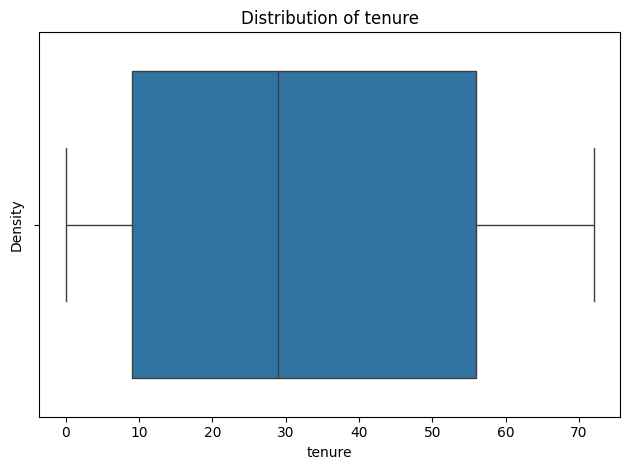



Column: monthlycharges
No outliers detected based on z-scores (threshold = 3).


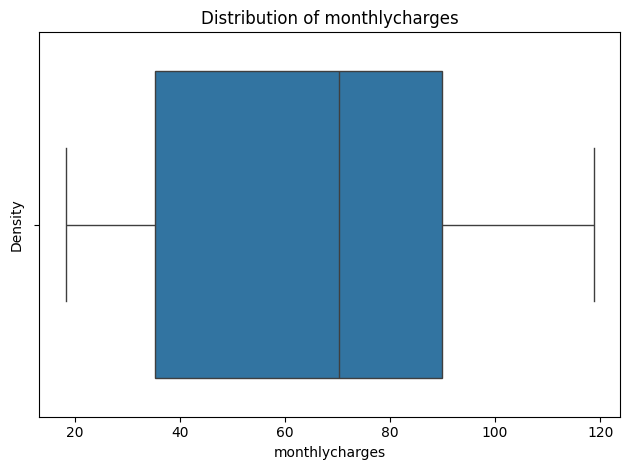



Column: totalcharges
No outliers detected based on z-scores (threshold = 3).


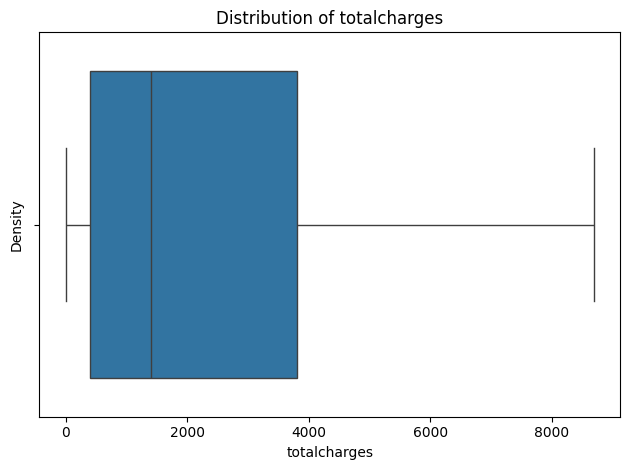

In [140]:
from scipy import stats  # For z-score outlier detection
import matplotlib.pyplot as plt
import seaborn as sns

df = churn_df
# Define a threshold for z-scores (3 standard deviations as mentioned above)
z_threshold = 3

# Iterate through the columns
for col in ['tenure', 'monthlycharges', 'totalcharges']:
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(df[col]))

    # Find outliers (z-scores greater than threshold)
    outlier_indices = df[z_scores > z_threshold].index

    # Print results
    print(f"Column: {col}")
    if len(outlier_indices) > 0:
        print("Outlier indices:", outlier_indices.tolist())
    else:
        print(f"No outliers detected based on z-scores (threshold = {z_threshold}).")
    # print the box plots
    sns.boxplot(x = col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()
    print('\n')


The results of the Box plots and Z scores confirm there are no outliers in the continuous numerical columns.

If the edges of the blue boxes were out side the 'whiskers' of the box plots this woould indicated outliers in the data.

# Pre Model Algorithms


<details>
<summary style="font-size: 18px; font-weight: bold;">Encoding Data</summary>

To make the the data easier to use in further analysis categorical, variables need to be encoded so they can be processed by the modelling algorithms.

This website was used to assist with understand catagorising of variables: <href>https://ai-ml-analytics.com/encoding/</href>

One Hot Encoding we be used for catagorising variables, This allows categorical features to be encoded for use in model training. This creates multiple boolean columns each values in a Categorical column.  Pandas has the function pandas.get_dummies that does this.  As mentioned by Theobold (2024) Machine Learning with Python, Packt Publishing. Available at: https://learning.oreilly.com/library/view/machine-learning-with/9781835461969/index_split_016.html (Accessed: March 31, 2024).

* Categorical variables with 2 values (E.g. Yes/No) can be encoded as binary - 0/1
* Nominal variables can be encoded using One Hot Encoder (E.g Gender)
* Numerical variables such as Tenure do not need to be encoded.  However they could be scaled


| Column Name      | Type of Variable | Catagorisation to be applied                                                                            |
|------------------|------------------|---------------------------------------------------------------------------------------------------------|
| CustomerID       | Identifier       | A unique identifier assigned to each customer.                                                          |
| Gender           | Nominal          | One Hot Encoding                                                                                        |
| SeniorCitizen    | binary           | One Hot Encoding                                                                                        |
| Partner          | binary           | One Hot Encoding                                                                                        |
| Dependents       | binary           | One Hot Encoding                                                                                        |
| Tenure           | Numerical        | None necessary                                                                                          |
| PhoneService     | binary           | One Hot Encoding                                                                                        |
| MultipleLines    | Nominal          | One Hot Encoding - can be converted to a binary variable as 'no phone service' is the same as a 'no'    |
| InternetService  | binary           | One Hot Encoding                                                                                        |
| OnlineSecurity   | Nominal          | One Hot Encoding - can be converted to a binary variable as 'no internet service' is the same as a 'no' |
| OnlineBackup     | Nominal          | One Hot Encoding - can be converted to a binary variable as 'no internet service' is the same as a 'no' |
| DeviceProtection | Nominal          | One Hot Encoding - can be converted to a binary variable as 'no internet service' is the same as a 'no' |
| TechSupport      | Nominal          | One Hot Encoding - can be converted to a binary variable as 'no internet service' is the same as a 'no' |
| StreamingTV      | Nominal          | One Hot Encoding - can be converted to a binary variable as 'no internet service' is the same as a 'no' |
| StreamingMovies  | Nominal          | One Hot Encoding - can be converted to a binary variable as 'no internet service' is the same as a 'no' |
| Contract         | Nominal          | One Hot Encoding                                                                                        |
| PaperlessBilling | binary           | One Hot Encoding                                                                                        |
| PaymentMethod    | Nominal          | One Hot Encoding                                                                                        |
| MonthlyCharges   | Numerical        | None necessary                                                                                          |
| TotalCharges     | Numerical        | None necessary                                                                                          |
| Churn            | binary           | One Hot Encoding                                                                                        |

</details>

##### Create Function to encode and scale data

In [141]:

from sklearn.preprocessing import StandardScaler # used to scale numerical continous variables

@timeit
def encode_df_columns(df: pd.DataFrame,
                      nominal_vars: list = None,
                      convert_to_binary: list = None,
                      binary_vars: list = None,
                      numerical_continuous: list = None) -> pd.DataFrame:
    """
    Encodes and scales columns in a pandas DataFrame for machine learning models.

    This function takes a DataFrame and a set of column lists specifying how to encode
    different types of columns for processing

    if args are not passed into the function the columns will not be processed

    Args:
      df (pd.DataFrame): DataFrame containing columns to encode
      nominal_vars (list): of columns with nominal (categorical) data. These
        will be one-hot encoded using `pd.get_dummies`.
      convert_to_binary (list): of columns with values that should be converted
        to binary ('Yes'/'No' or similar). Any other values will be converted to 'No'.
      binary_vars (list): of columns that are already binary (0/1, 'Yes'/1, etc.).
        These will be left as-is.
      numerical_continuos (list): (optional) List of columns containing numerical
        continuous data. These will be scaled using sklearn StandardScaler

    Returns:
      pd.DataFrame - with the encoded columns.

    Raises:
        ValueError: If any column is specified in multiple lists or if
        a column in `convert_to_binary` does not contain 'Yes' or 'No' values.
    """


    df_copy = df.copy()


    # for columns that have yes/no and other, convert all other values to No
    if convert_to_binary != None:
        for column in convert_to_binary:
          if not set(['Yes', 'No']).issubset(df[column].unique()):
            raise ValueError(f"Column '{column}' in convert_to_binary must contain 'Yes' or 'No' values.")
          else:
            df_copy.loc[~df[column].isin(['Yes', 'No']), column] = 'No'
    else:
        convert_to_binary = []

    # Combine lists for conversion to binary

    if binary_vars != None:
        convert_to_bool = convert_to_binary + binary_vars
    else:
        convert_to_bool = convert_to_binary

    # Encode convert_to_binary columns
    for column in convert_to_bool:
        df_copy[f'encoded_{column}'] = df_copy[column].isin(['Yes', 1, '1'])  # Handle both numeric and string 'Yes'/1'


    # Encode nominal variables
    if nominal_vars != None:
        df_copy = pd.get_dummies(df_copy, columns=nominal_vars)

    # Scale numerical continuous columns
    if numerical_continuous != None:
        scaler = StandardScaler()
        df_copy[numerical_continuous] = scaler.fit_transform(df_copy[numerical_continuous])

    return df_copy



##### Run the function on the data

Lists are created to stored the columns according to how they need to be treated.  As described above.

**The numerical continous variables of tenure, monthlycharges and totalcharges could be scaled here, but in the model training and testing it could be seen that scaling the variables decreased accuracy**


In [165]:


# Create lists for the different types or variables:
# outlined in the tables above

nominal_vars = ['contract', 'paymentmethod', 'gender', 'internetservice']

convert_to_binary = ['multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
 'techsupport', 'streamingtv', 'streamingmovies', ]

binary_vars = ['seniorcitizen', 'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn', ]

numerical = ['tenure', 'monthlycharges', 'totalcharges', ]

encoded_df = encode_df_columns(df=churn_df,
                               nominal_vars=nominal_vars,
                               convert_to_binary=convert_to_binary,
                               binary_vars=binary_vars,
                            # decision taking to not scale numericals as it affected model performace
                            #    numerical_continuous=numerical
                               )

encoded_df = standardise_column_names(encoded_df)

analyze_dataframe(encoded_df)
print()
# unique_values = churn_df['internetservice'].value_counts()

# print(unique_values)
# print()
# print(type(unique_values))
# print()
# print(f'Columns in the Encoded DataFrame: \n{encoded_df.dtypes}')
# print()
encoded_df

Function encode_df_columns took 0.0546 seconds to execute
Function standardise_column_names took 0.0058 seconds to execute
* There are no null or missing values in the DataFrame.

*  No duplicate rows found in the DataFrame

NDV : Number of distinct Values
If NDV > 5 values will not be printed

| Column                                |                             |                          |                         |                                   |
|---------------------------------------|-----------------------------|--------------------------|-------------------------|-----------------------------------|
| customerid                            | NDV: 6543, (greater than 5) | Min: 0002-ORFBO          | Max: 9995-HOTOH         | Avg: Cannot Calculate due to Type |
| seniorcitizen                         | Counts by value:            | 0: 5485                  | 1: 1058                 |                                   |
| partner                               | Counts by value:  

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_two_year,paymentmethod_bank_transfer_automatic,paymentmethod_credit_card_automatic,paymentmethod_electronic_check,paymentmethod_mailed_check,gender_female,gender_male,internetservice_dsl,internetservice_fiber_optic,internetservice_no
0,4374-YMUSQ,0,No,No,0.063444,Yes,Yes,Yes,Yes,Yes,...,0,0,1,0,0,0,1,0,1,0
1,4513-CXYIX,1,Yes,No,1.569406,Yes,Yes,Yes,No,No,...,1,0,1,0,0,1,0,0,1,0
2,3957-HHLMR,0,Yes,Yes,1.528704,Yes,Yes,Yes,No,No,...,0,1,0,0,0,1,0,1,0,0
3,7803-XOCCZ,0,Yes,Yes,0.796074,Yes,No,Yes,No,Yes,...,0,1,0,0,0,1,0,0,1,0
4,5736-YEJAX,0,No,Yes,1.488003,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,6840-RESVB,0,Yes,Yes,-0.343572,Yes,Yes,Yes,No,Yes,...,0,0,0,0,1,0,1,1,0,0
74,2234-XADUH,0,Yes,Yes,1.610108,Yes,Yes,No,Yes,Yes,...,0,0,1,0,0,1,0,0,1,0
75,4801-JZAZL,0,Yes,Yes,-0.872694,No,No,Yes,No,No,...,0,0,0,1,0,1,0,1,0,0
76,8361-LTMKD,1,Yes,No,-1.157606,Yes,Yes,No,No,No,...,0,0,0,0,1,0,1,0,1,0


##### Split the Data into train and test sets

Prior to EDA the data needs to be split into training and test sets.  This is to ensure the the test set is kept hidden and does not inform decsions.



In [166]:
# DataFrame is filtered to only keep the encoded columns for easy processing in EDA
from sklearn.model_selection import train_test_split

encoded_columns = [
'tenure',
'monthlycharges',
'totalcharges',
'encoded_multiplelines',
'encoded_onlinesecurity',
'encoded_onlinebackup',
'encoded_deviceprotection',
'encoded_techsupport',
'encoded_streamingtv',
'encoded_streamingmovies',
'encoded_seniorcitizen',
'encoded_partner',
'encoded_dependents',
'encoded_phoneservice',
'encoded_paperlessbilling',
'encoded_churn',
'contract_month_to_month',
'contract_one_year',
'contract_two_year',
'paymentmethod_bank_transfer_automatic',
'paymentmethod_credit_card_automatic',
'paymentmethod_electronic_check',
'paymentmethod_mailed_check',
'gender_female',
'gender_male',
'internetservice_dsl',
'internetservice_fiber_optic',
'internetservice_no',
]

# filtered_df = encoded_df.filter(encoded_columns, axis=1) # filter the DataFrame

# filtered_df

# Separate features and target variable
X = (encoded_df[encoded_columns])  # Features
y = encoded_df['encoded_churn']  # Target variable

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# eda_dataset = pd.concat([X_train, y_train], axis=1)
eda_dataset = X_train

analyze_dataframe(eda_dataset)

eda_dataset


X_train shape: (4580, 28)
X_test shape: (1963, 28)
y_train shape: (4580,)
y_test shape: (1963,)
* There are no null or missing values in the DataFrame.

*  Duplicates rows found in the DataFrame.

NDV : Number of distinct Values
If NDV > 5 values will not be printed

| Column                                |                             |                          |                         |                             |
|---------------------------------------|-----------------------------|--------------------------|-------------------------|-----------------------------|
| tenure                                | NDV: 73, (greater than 5)   | Min: -1.3204122570748056 | Max: 1.6101075822703115 | Avg: -0.005650740723782537  |
| monthlycharges                        | NDV: 1389, (greater than 5) | Min: -1.5407028951660595 | Max: 1.7900310836487217 | Avg: -0.0037984185476701176 |
| totalcharges                          | NDV: 4356, (greater than 5) | Min: -1.005523496010485  | Max: 2.817298

,tenure,monthlycharges,totalcharges,encoded_multiplelines,encoded_onlinesecurity,encoded_onlinebackup,encoded_deviceprotection,encoded_techsupport,encoded_streamingtv,encoded_streamingmovies,...,contract_two_year,paymentmethod_bank_transfer_automatic,paymentmethod_credit_card_automatic,paymentmethod_electronic_check,paymentmethod_mailed_check,gender_female,gender_male,internetservice_dsl,internetservice_fiber_optic,internetservice_no
2447,0.673969,0.854040,0.972904,False,False,True,True,False,True,False,...,0,0,1,0,0,0,1,0,1,0
837,-0.058661,-1.469342,-0.737414,False,False,False,False,False,False,False,...,1,1,0,0,0,0,1,0,0,1
4740,1.325196,1.366844,1.954866,False,False,True,True,True,True,True,...,1,0,1,0,0,1,0,0,1,0
3700,1.325196,-0.156631,0.720442,False,True,False,True,True,True,True,...,1,0,1,0,0,1,0,1,0,0
17,-0.913396,1.242377,-0.535044,True,False,True,True,False,True,True,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.958881,-1.311684,-0.421347,True,False,False,False,False,False,False,...,1,0,1,0,0,0,1,0,0,1
31,-1.157606,-1.484278,-0.975504,False,False,False,False,False,False,False,...,0,0,0,0,1,0,1,0,0,1
66,0.592566,-1.439470,-0.546950,False,False,False,False,False,False,False,...,1,1,0,0,0,1,0,0,0,1
56,1.488003,0.686425,1.590358,True,True,False,True,True,True,True,...,1,0,1,0,0,1,0,1,0,0


# Exploratory Data Analysis (EDA)

In [167]:
# optional step to output the file to excel for review
# df_encoded.to_excel('churn_for_testing.xlsx')

#### EDA Steps

Now the data has been encoded it can be explored to see how the features interact the the target variable : encoded_churn.

In this step a correlation matrix has ben produced along with charts plotting the average churn rate against all binary features and then a scatter plots to of the continuous variables of Total Charges and Monthly Charges against tenure, split by encoded_churn.


### Correlation Matrix

This is a visual representation of how features related to one another

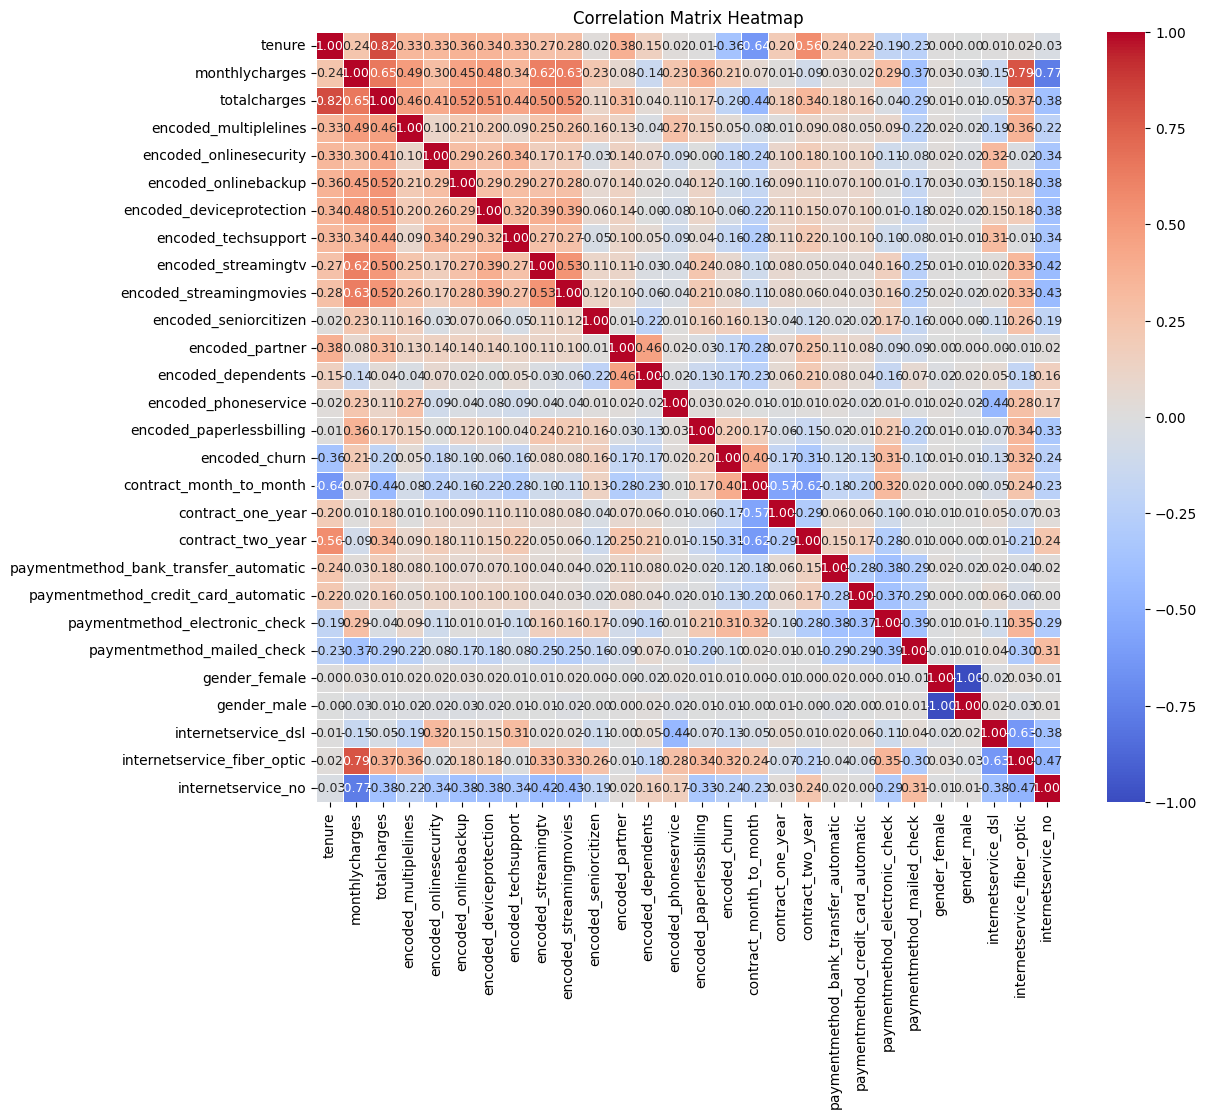

In [168]:

import seaborn as sns
import matplotlib.pyplot as plt

def visual_correlation_matrix(df: pd.DataFrame)->None:
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Plot correlation matrix heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.4,
                annot_kws={"fontsize":9})
    plt.title('Correlation Matrix Heatmap')
    plt.show()


visual_correlation_matrix(eda_dataset)


##### Columns with Significant correlations:

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def check_correlations(df:pd.DataFrame)->None:
    churn_corr = df.corr()['encoded_churn'].drop('encoded_churn')

    # Check if there are any significant correlations (absolute correlation > 0.2)
    significant_corr = churn_corr[abs(churn_corr) >= 0.20]

    # Print significant correlations
    if len(significant_corr) > 0:
        print("\nColumns with significant correlation to churn_indicator:")
        print(significant_corr)
    else:
        print("\nNo significant correlations found.")

check_correlations(eda_dataset)


Columns with significant correlation to churn_indicator:
tenure                           -0.361429
monthlycharges                    0.206771
totalcharges                     -0.201669
encoded_paperlessbilling          0.200978
contract_month_to_month           0.403933
contract_two_year                -0.306008
paymentmethod_electronic_check    0.314348
internetservice_fiber_optic       0.317249
internetservice_no               -0.236117
Name: encoded_churn, dtype: float64


In [170]:

# This cell was coded but it not used
# def get_average_by_feature(df, target_var)->pd.DataFrame:
#     # Group by churn indicator column and calculate mean of each column
#     churn_percentage = df.groupby(target_var).mean() * 100

#     # Transpose DataFrame for easier comparison
#     churn_percentage = churn_percentage.transpose()

#     # # Calculate percentage churn for each item relative to total churned instances
#     total_churned_instances = df[target_var].sum()
#     # churn_percentage['Churned % of Total'] = (filtered_df.groupby('encoded_churn').sum() / total_churned_instances * 100).iloc[:, 1]

#     # # Rename columns for clarity
#     # churn_percentage.columns = ['Not Churned (%)', 'Churned (%)', 'Churned % of Total']


#     # Calculate percentage churn for each item relative to total churned instances
#     churned_percentage = (df[df[target_var]][df.columns[:-1]].sum() / total_churned_instances * 100).rename(f'{target_var} % of Total')

#     # Combine churned percentages with the mean percentages for churned and not churned
#     result_df = pd.concat([df.mean() * 100, churned_percentage], axis=1)
#     # result_df.columns = ['Not Churned (%)', 'Churned (%)', 'Churned % of Total']

#     print(churned_percentage)

#     print(result_df)

#     return result_df


# avg_churn = get_average_by_feature(df=eda_dataset, target_var = 'encoded_churn')



### Plotting Churn against encoded binary features

To help identify if any subsets of the data exhibit a high churn rate than the average for the data, a step has been written to calculuate the % Churn/Not Churn for each feature.

The results of this can help with selecting features to use in the modelling step.

This is then presented in an interactive chart using Bokeh.

In [171]:

df = eda_dataset

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame(columns=[])

loop_columns = (df.columns).tolist()
# print(loop_columns)

# print(type(loop_columns))

loop_columns.remove('encoded_churn')
loop_columns.remove('tenure')
loop_columns.remove('monthlycharges')
loop_columns.remove('totalcharges')

# print(loop_columns)

# Iterate over columns and calculate percentages and totals
for col in loop_columns:  # Exclude the 'encoded_churn' column
    churn_count = df[df[col] & df['encoded_churn']].shape[0]
    not_churn_count = df[df[col] & ~df['encoded_churn']].shape[0]
    total_churn = df['encoded_churn'].sum()
    total_not_churn = df['encoded_churn'].count() - total_churn
    total = total_churn + total_not_churn


    category_df = pd.DataFrame ([{
        'feature': col,
        'pct_churn': round((churn_count / (churn_count+not_churn_count)) * 100, 2),
        'pct_not_churn': round((not_churn_count / (churn_count+not_churn_count)) * 100, 2),
        'total_churn': churn_count,
        'total_not_churn': not_churn_count,
        'total_customers': total
    }])

    result_df = pd.concat([result_df,
            category_df], ignore_index=True)

# Add totals for the entire dataset
total_churn = df['encoded_churn'].sum()
total_not_churn = df['encoded_churn'].count() - total_churn
total = total_churn + total_not_churn



temp_df = pd.DataFrame([{
    'feature': 'Total Churn',
    'pct_churn': round( (total_churn / total) * 100 ,2),
    'pct_not_churn': round ((total_not_churn / total) * 100, 2),
    'total_churn': total_churn,
    'total_not_churn': total_not_churn,
    'total_customers': total
}])

result_df = pd.concat([result_df, temp_df], ignore_index=True)

# result_df = result_df.transpose()

# Display the result
result_df


,feature,pct_churn,pct_not_churn,total_churn,total_not_churn,total_customers
0,encoded_multiplelines,28.39,71.61,551,1390,4580
1,encoded_onlinesecurity,13.87,86.13,181,1124,4580
2,encoded_onlinebackup,20.23,79.77,314,1238,4580
3,encoded_deviceprotection,22.24,77.76,344,1203,4580
4,encoded_techsupport,14.96,85.04,197,1120,4580
5,encoded_streamingtv,30.44,69.56,527,1204,4580
6,encoded_streamingmovies,30.22,69.78,537,1240,4580
7,encoded_seniorcitizen,42.20,57.80,314,430,4580
8,encoded_partner,18.58,81.42,412,1805,4580
9,encoded_dependents,14.88,85.12,205,1173,4580


In [172]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook


output_notebook()

TOOLTIPS = [
    # create the dynamic tooltips for the chart
    ("Feature", "@x"),
    ("Churn", "$name"),
    ("Value:", "@$name%"),
    ("Churn/Non Churn:", "@total_churn / @total_not_churn"),
]

# LEGEND_ITEMS = [
#     # add the legend
#     ("% Churn", "@pct_churn"),
#     ("% Non Churn", "@pct_not_churn"),
# ]

label_l = ['Churn', 'Non Churn']

result_df['Rank'] = result_df.apply(lambda x: 1 if x['feature'] == 'Total Churn' else None, axis=1)
min_rank = 2  # Starting rank for other categories
result_df.loc[result_df['feature'] != 'Total Churn', 'Rank'] = result_df[result_df['feature'] != 'Total Churn']['pct_churn'].rank(ascending=False, method='min') + min_rank

# Sort the DataFrame based on the 'Rank' column
result_df = result_df.sort_values(by='Rank')

data = result_df

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(x=data['feature'], top=data['total_customers'], churn=data['pct_churn'], not_churn=data['pct_not_churn'],
                                total_churn=data['total_churn'], total_not_churn=data['total_not_churn']))

# Create the figure
p = figure(x_range=data['feature'], height=700, width = 1200, title="Churn Rate by Feature", tools="hover", tooltips=TOOLTIPS)

# get the % churn for the whole dataset to use as a benchmark:
average_value = result_df[result_df['feature'] == 'Total Churn']['pct_churn'].values[0]

p.line(x=[0,100], y=[average_value, average_value], color='blue', line_width=2, legend_label='Average Churn')

# Stacked bars for Churn and Not Churn percentages with explicit stackers
p.vbar_stack(
    x='x',
    source=source,
    color=['salmon', 'lightgreen'],
    width=0.5,
    fill_alpha=0.5,
    legend_label=label_l,
    # legend_label = LEGEND_ITEMS,
    # top='top',
    line_color="white",
    stackers=['churn', 'not_churn'],  # Explicitly define stackers
)


# Customize the plot
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Feature"
p.yaxis.axis_label = "Percentage"
p.legend.location = "top_right"
p.legend.click_policy = "hide"
p.min_border_left = 100

p.xaxis.major_label_orientation = 1
# Display the chart
show(p)




1.   Columns gender and phone serivce have little effect on the churn rate so could be excluded from the model build.  Excluding gender could also be a good thing to do for ethical reasons.
2.   The columns from paymentmethod_electronic_check to internetservice_fiber_optic	all seem to have a high churn rate, so i would expect this to be key in the model
3.   Customers with a 1 or 2 year contract have a very low churn rate as opposed to those who have a month to month contract.
4.   Customers with no internet service also show a low churn rate



### Plotting Churn against Continous features

The continoues featues in the dataset are Tenure, Total Charges and Monthly Charges.

This are visualised in scatter plots to see in any patterns can be identified.


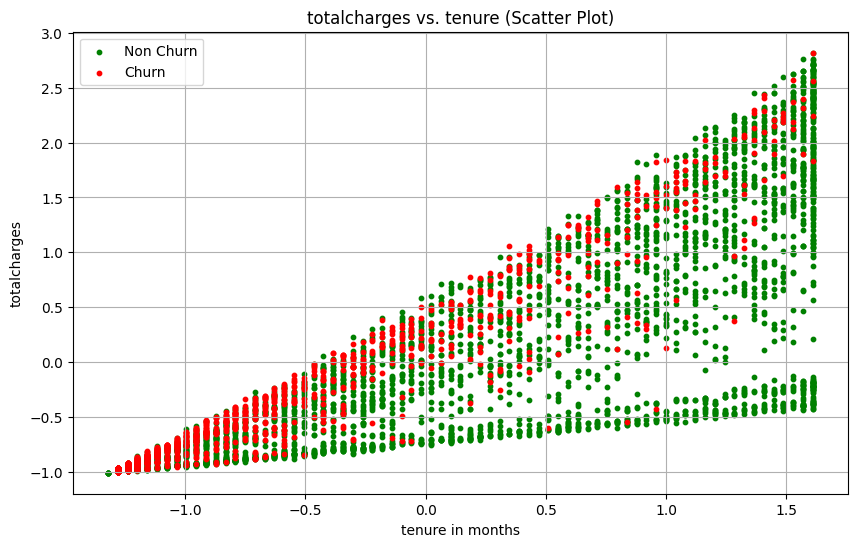

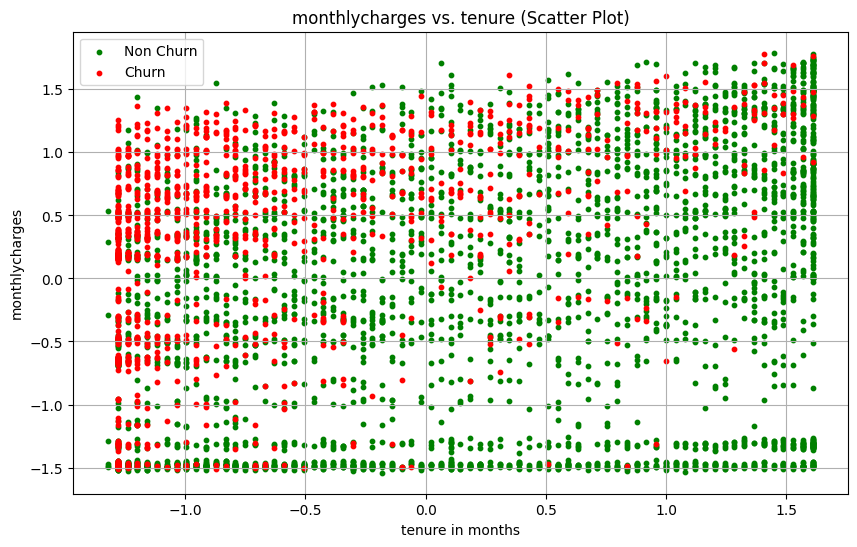

In [173]:
import matplotlib.pyplot as plt


def plot_continuous_vars(df: pd.DataFrame, churn_col, x_col, y_col, x_units=None, y_units=None):

    if x_units == None:
        x_units = ''
    if y_units == None:
        y_units = ''

    # split the DataFrame into two to allow for different colours in the plot
    df_c = df[df[churn_col] == True]
    df_nc = df[df[churn_col] == False]

    chart_labels = ['Not Churned', 'Churned']

    # Create the scatter plot
    plt.figure(figsize=(10, 6))

    # plot the dfs seperately to allow for dif colours
    plt.scatter(df_nc[x_col], df_nc[y_col], c='green', s=10, label = 'Non Churn')
    plt.scatter(df_c[x_col], df_c[y_col], c='red', s=10, label = 'Churn')


    # add labels and title
    plt.xlabel(f'{x_col} in {x_units}')
    plt.ylabel(y_col)
    plt.legend()
    plt.title(f'{y_col} vs. {x_col} (Scatter Plot)')
    plt.grid(True)  # Add grid lines
    # plt.text(110, 100, 'Chart shows that customers that have a short tenure or', fontsize=12, color='red', ha='right')
    # plt.text(110, 100, 'a long tenure with higher charges are more likely to churn', fontsize=12, color='red', ha='right')

    # Display the plot
    plt.show()

plot_continuous_vars(df=eda_dataset, churn_col='encoded_churn', x_col='tenure', y_col='totalcharges', x_units = 'months')
print()
plot_continuous_vars(df=eda_dataset, churn_col='encoded_churn', x_col='tenure', y_col='monthlycharges', x_units = 'months')


Principal Component Analysis
https://learning.oreilly.com/library/view/machine-learning-with/9781835461969/index_split_019.html

"One of the most popular dimension reduction techniques is principal component analysis (PCA)"

As the 3 continuos columns in the dataframe seem to have a relationship to customers that churn, it would be useful to encoded them to enable them to be used in the modelling process.





In [174]:
# from sklearn.preprocessing import StandardScaler

# df = df_encoded[['tenure', 'monthlycharges', 'encoded_churn']]

# scaler = StandardScaler()
# scaler.fit(df)
# scaled_data = scaler.transform(df)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(scaled_data)
# scaled_pca = pca.transform(scaled_data)
# scaled_data.shape

# #State the size of the plot
# plt.figure(figsize=(10,8))
# plt.scatter(scaled_pca[:, 0],scaled_pca[:, 1],c=df['encoded_churn'])



# #State the scatterplot labels
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')


# plt.figure(figsize=(10,8))
# legend = df['encoded_churn']



# #Add indigo and yellow RGB colors
# colors = {0: '#4B0082', 1: '#FFFF00'}
# labels = {0: 'Did not churn', 1: 'churned'}



# #Use a for-loop to set color for each data point

# for t in np.unique(legend):
#     ix = np.where(legend == t)
#     plt.scatter(scaled_pca[ix,0], scaled_pca[ix,1], c=colors[t], label=labels[t])

# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.legend()
# plt.show()

# print(type(scaled_data))


In [175]:
print(encoded_df.columns)

Index(['customerid', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'monthlycharges', 'totalcharges', 'churn',
       'encoded_multiplelines', 'encoded_onlinesecurity',
       'encoded_onlinebackup', 'encoded_deviceprotection',
       'encoded_techsupport', 'encoded_streamingtv', 'encoded_streamingmovies',
       'encoded_seniorcitizen', 'encoded_partner', 'encoded_dependents',
       'encoded_phoneservice', 'encoded_paperlessbilling', 'encoded_churn',
       'contract_month_to_month', 'contract_one_year', 'contract_two_year',
       'paymentmethod_bank_transfer_automatic',
       'paymentmethod_credit_card_automatic', 'paymentmethod_electronic_check',
       'paymentmethod_mailed_check', 'gender_female', 'gender_male',
       'internetservice_dsl', 'internetservice_fiber_optic',
       'internetservice_no'

# Training and Testing the Model

<details>
<summary>Click to expand/collapse</summary>

As predicting churn is a binary classification problem, using a decision tree algorithm should yield good results.

Decsion trees are simple to implement and can be easily explained to help stakeholders understand how the model works.

To train the model, three different decision tree algorthims are compared.  

1.   Decisision Trees
2.   XGBoost or Gradiant Boosting
3.   Random Forests

More infomation of these three alogrithms can be found in Theobald, O. (2024) TREE-BASED METHODS | Machine Learning with Python, Packt Publishing. Available at: https://learning.oreilly.com/library/view/machine-learning-with/9781835461969/index_split_040.html (Accessed: March 31, 2024).

When comparing the output of the algorithms the following metrics will be measured as discussed by Müller & Sarah Guido (2017) 5. Model Evaluation and Improvement | Introduction to Machine Learning with Python, O’Reilly Media, Inc. Available at: https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/ch05.html#keep-the-end-goal-in-mind (Accessed: March 31, 2024).

As the consequences of classifying a non-churning customer, as a customer who is likely to churn, are fairly minimal, if the model does have a relatively high false positive rate is not so much of an issue.


*   ROC-AUC - (Area Under the Receiver Operating Characteristics Curve) This plots false positive rate verses true postive rate.  The higher the ROC Curve area the more accuate the predictions.
*   Accuracy - the proporation of correct predictions on the test dataset.  This will also be summarised in a Confusion Matrix.
*   Precision - measures how many of the cases predicted as positive were actually postive.
*   F1 Score -

The threshold for the precsions and accuracy test will be left at 0.5.  This means that no weight is being applied to postive or negative predictions.







</details>

### Fuctions for Training the models

To make repeatedly running the models simpler, funcitons we created that accept the test and training sets along with with some key parameters.



In [176]:
from sklearn.model_selection import train_test_split

# Create a list for features to allow them to be easily commented out for tuning
# re run the test/train splits but remove the target variable from the X train
features_to_include = (
[
       'tenure',
       'monthlycharges',
       'totalcharges',
       'encoded_multiplelines',
       'encoded_onlinesecurity',
       'encoded_onlinebackup',
       'encoded_deviceprotection',
       'encoded_techsupport',
       'encoded_streamingtv',
       'encoded_streamingmovies',
       'encoded_seniorcitizen',
       'encoded_partner',
       'encoded_dependents',
       'encoded_paperlessbilling',
       'encoded_phoneservice',
       'contract_month_to_month',
       'contract_one_year',
       'contract_two_year',
       'paymentmethod_bank_transfer_automatic',
       'paymentmethod_credit_card_automatic',
       'paymentmethod_electronic_check',
       'paymentmethod_mailed_check',
       'gender_female',
       'gender_male',
       'internetservice_dsl',
       'internetservice_fiber_optic',
       'internetservice_no'
       ])

# Separate features and target variable
X = (encoded_df[features_to_include])  # Features
y = encoded_df['encoded_churn']  # Target variable

# Split the dataset into train and test sets (70% train, 30% test)
# as the dataset is the same as for the previous test/train split
# and the same random_state is use the test/train datasets should be the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4580, 27)
X_test shape: (1963, 27)
y_train shape: (4580,)
y_test shape: (1963,)


In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn for visualization in confusion matrix
import numpy as np


def visualise_confusion_matrix(cn_matrix: np.ndarray)->None:
    """
    Uses seaborn to print a graphical representation of a
    Confusion Matrix

    Args:
        cn_matrix (np.ndarray): A numpy array produced by sklearn.metrics.confusion_matrix
    """
    # print(type(cn_matrix))
    # Create a heatmap of the confusion matrix
    ax = sns.heatmap(cn_matrix, annot=True, fmt='d', linewidths=0.4,)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    plt.close()


def decision_tree_classifier(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame,
                             max_tree_depth: int=None, model_desc: str = 'Decision Tree Classifier'):
    print(type(X_train))
    # Define and train the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)


    # Make predictions on the testing set (get probabilities)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    # print(y_pred_proba)
    # Calculate ROC curve metrics (false positive rate, true positive rate, thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate AUC (Area Under the ROC Curve)
    roc_auc = auc(fpr, tpr)

    model_title = f"*  {model_desc}  *"
    print("*" * len(model_title))
    print(model_title)
    print("*" * len(model_title))



    if np.any(~((y_pred_proba <= 1e-6) | (y_pred_proba >= 1 - 1e-6))):
        print('Cannot plot ROC curve for binary values, probabilities are required\n')
    else:
        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Reference line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {model_desc}')
        plt.legend(loc="lower right")
        plt.show()
        plt.close()

    visualise_confusion_matrix(confusion_matrix(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred)) # Calculate accuracy
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) # Confusion matrix
    print("\nClassification Report:\n", classification_report(y_test, y_pred)) # Classification report


def xgboost_classifier(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame,
                       num_rounds :int, model_desc: str = 'XGBoost Classifier'):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define XGBoost Parameters
    params = {
        'objective': 'binary:logistic',  # Suitable for binary classification
        'max_depth': 6,                  # Initial tree depth
        'eta': 0.3,                      # Learning rate
        'eval_metric': 'error'           # Error rate as evaluation metric
    }


    # Train the XGBoost Model
    xgb_model = xgb.train(params, dtrain, num_rounds)

    # Predictions on the Test Set
    y_pred = xgb_model.predict(dtest)

    # ROC Curve Calculation
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Calculate ROC curve parameters
    roc_auc = auc(fpr, tpr)  # Calculate Area Under the ROC Curve (AUC)
    # print(f"thresholds {thresholds}")
    model_title = f"*  {model_desc}  *"
    print("*" * len(model_title))
    print(model_title)
    print("*" * len(model_title))

    # Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)  # Plot ROC curve with AUC
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_desc}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display the ROC curve
    plt.close()

    # evaluation metrics
    cm = confusion_matrix(y_test, y_pred > 0.5)
    visualise_confusion_matrix(cm)
    print("Accuracy:", accuracy_score(y_test, y_pred > 0.5))  # Assuming threshold of 0.5
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred > 0.5))
    print("Classification Report:\n", classification_report(y_test, y_pred > 0.5))


def random_forest_classifier(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame,
                             num_estimators: int,
                             model_desc: str = 'Random Forest Classifier'):
    # Create a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=num_estimators, random_state=42)

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Make predictions on the testing set (get probabilities)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    # print(type(y_pred_proba))
    # Calculate ROC curve metrics (false positive rate, true positive rate, thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate AUC (Area Under the ROC Curve)
    roc_auc = auc(fpr, tpr)

    model_title = f"*  {model_desc}  *"
    print("*" * len(model_title))
    print(model_title)
    print("*" * len(model_title))


    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_desc}')
    plt.legend(loc="lower right")
    plt.show()
    plt.close()

    visualise_confusion_matrix(confusion_matrix(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, y_pred > 0.5))


<class 'pandas.core.frame.DataFrame'>
[0. 0. 0. ... 1. 0. 0.]
******************************
*  Decision Tree Classifier  *
******************************
Cannot plot ROC curve for binary values, probabilities are required



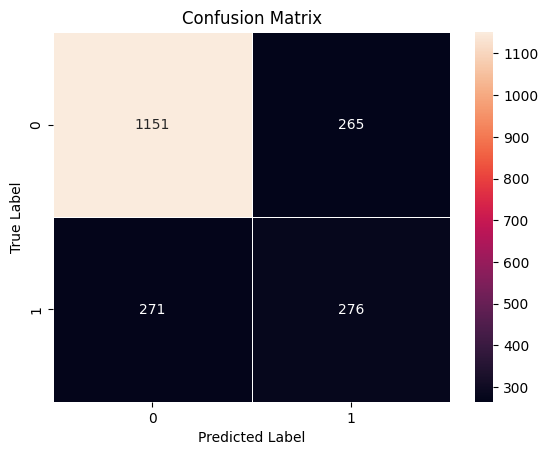

Accuracy: 0.7269485481406012

Confusion Matrix:
 [[1151  265]
 [ 271  276]]

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.81      0.81      1416
        True       0.51      0.50      0.51       547

    accuracy                           0.73      1963
   macro avg       0.66      0.66      0.66      1963
weighted avg       0.73      0.73      0.73      1963

************************
*  XGBoost Classifier  *
************************


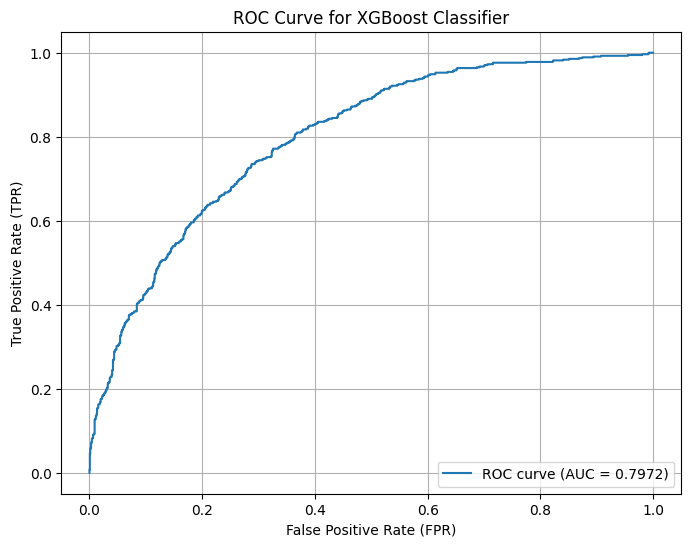

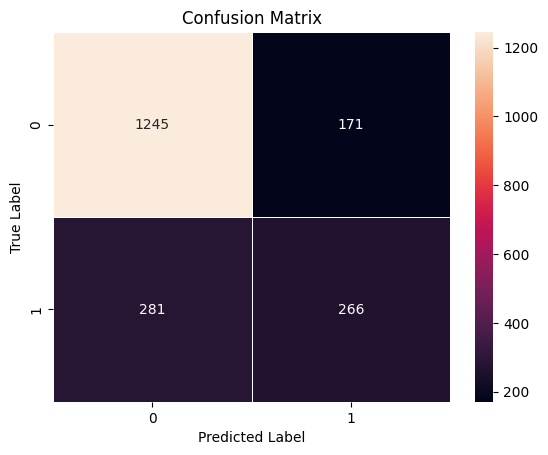

Accuracy: 0.7697401935812532
Confusion Matrix:
 [[1245  171]
 [ 281  266]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.88      0.85      1416
        True       0.61      0.49      0.54       547

    accuracy                           0.77      1963
   macro avg       0.71      0.68      0.69      1963
weighted avg       0.76      0.77      0.76      1963

******************************
*  Random Forest Classifier  *
******************************


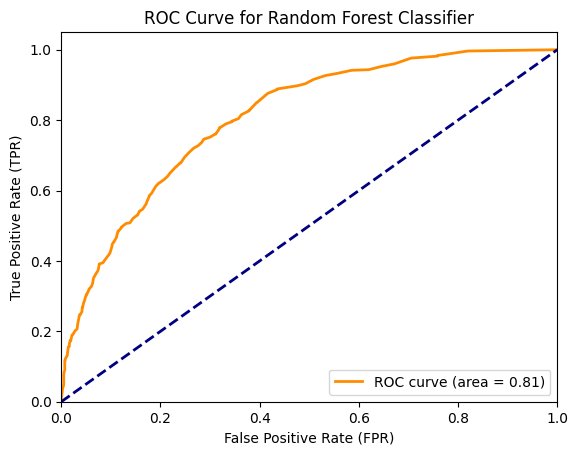

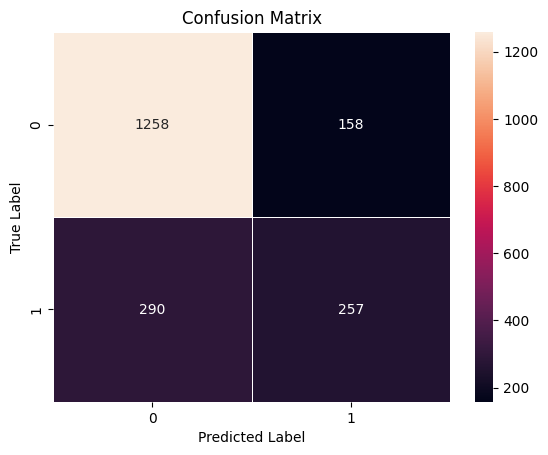

Accuracy: 0.7717778909831889
Confusion Matrix:
 [[1258  158]
 [ 290  257]]
F1 Score: 0.7612021099164838
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.89      0.85      1416
        True       0.62      0.47      0.53       547

    accuracy                           0.77      1963
   macro avg       0.72      0.68      0.69      1963
weighted avg       0.76      0.77      0.76      1963



In [178]:
# run the modelling algorithms over the train data and test against the test data
decision_tree_classifier(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
xgboost_classifier(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_rounds=200)
random_forest_classifier(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_estimators=100)

### Initial Results



### Dealing with Underepresented target data


<class 'pandas.core.frame.DataFrame'>
[0. 0. 1. ... 0. 0. 0.]
**************************************
*  SMOTE - Decision Tree Classifier  *
**************************************
Cannot plot ROC curve for binary values, probabilities are required



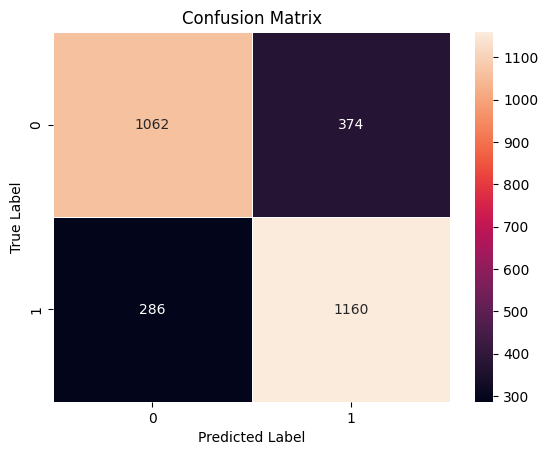

Accuracy: 0.7709923664122137

Confusion Matrix:
 [[1062  374]
 [ 286 1160]]

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.74      0.76      1436
        True       0.76      0.80      0.78      1446

    accuracy                           0.77      2882
   macro avg       0.77      0.77      0.77      2882
weighted avg       0.77      0.77      0.77      2882

********************************
*  SMOTE - XGBoost Classifier  *
********************************


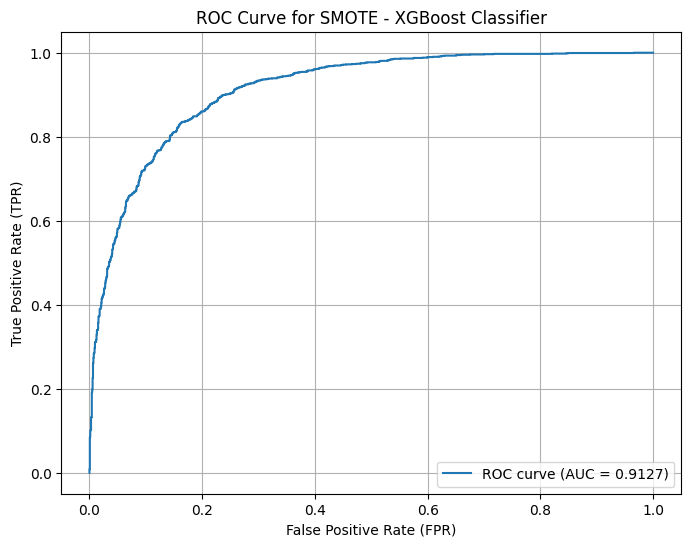

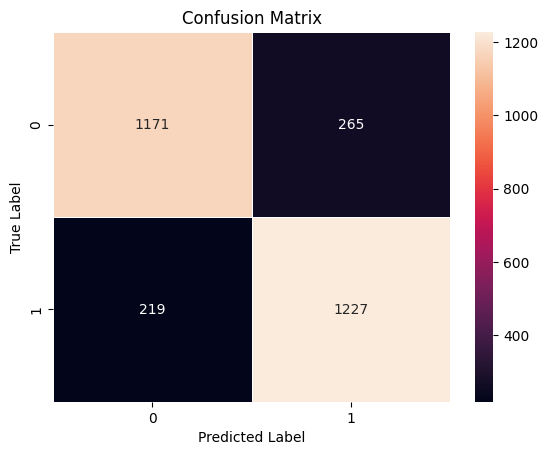

Accuracy: 0.8320610687022901
Confusion Matrix:
 [[1171  265]
 [ 219 1227]]
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.82      0.83      1436
        True       0.82      0.85      0.84      1446

    accuracy                           0.83      2882
   macro avg       0.83      0.83      0.83      2882
weighted avg       0.83      0.83      0.83      2882

**************************************
*  SMOTE - Random Forest Classifier  *
**************************************


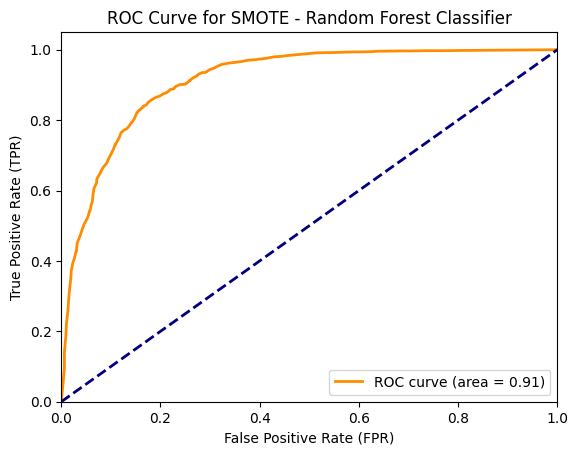

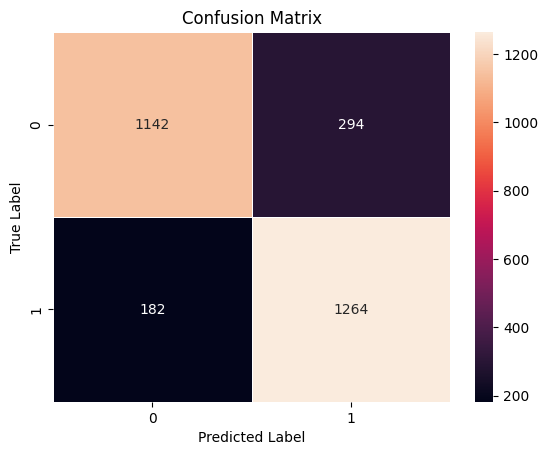

Accuracy: 0.8348369188063844
Confusion Matrix:
 [[1142  294]
 [ 182 1264]]
F1 Score: 0.834564722756018
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.80      0.83      1436
        True       0.81      0.87      0.84      1446

    accuracy                           0.83      2882
   macro avg       0.84      0.83      0.83      2882
weighted avg       0.84      0.83      0.83      2882



In [179]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE before splitting into train/test to avoid data leakage
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

# Now split into train/test
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)



decision_tree_classifier(X_train=X_train_smote, y_train=y_train_smote, X_test=X_test_smote, y_test=y_test_smote, model_desc='SMOTE - Decision Tree Classifier')
xgboost_classifier(X_train=X_train_smote, y_train=y_train_smote, X_test=X_test_smote, y_test=y_test_smote, num_rounds=200, model_desc='SMOTE - XGBoost Classifier')
random_forest_classifier(X_train=X_train_smote, y_train=y_train_smote, X_test=X_test_smote, y_test=y_test_smote, num_estimators=100, model_desc='SMOTE - Random Forest Classifier')




<class 'pandas.core.frame.DataFrame'>
[0. 0. 0. ... 1. 0. 0.]
******************************
*  Decision Tree Classifier  *
******************************
Cannot plot ROC curve for binary values, probabilities are required



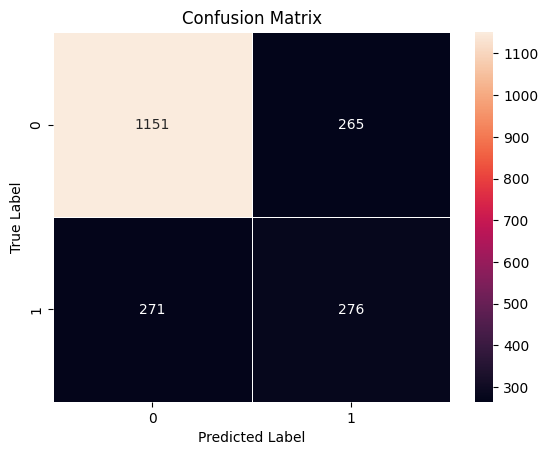

Accuracy: 0.7269485481406012

Confusion Matrix:
 [[1151  265]
 [ 271  276]]

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.81      0.81      1416
        True       0.51      0.50      0.51       547

    accuracy                           0.73      1963
   macro avg       0.66      0.66      0.66      1963
weighted avg       0.73      0.73      0.73      1963

************************
*  XGBoost Classifier  *
************************


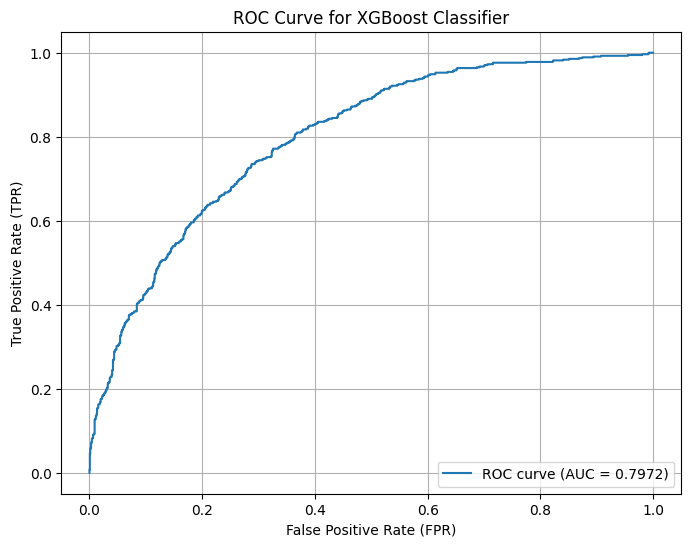

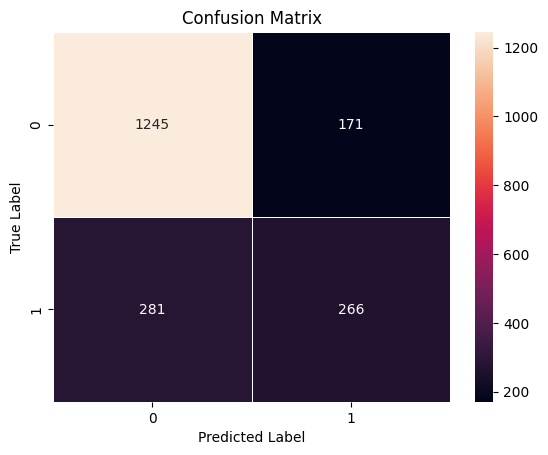

Accuracy: 0.7697401935812532
Confusion Matrix:
 [[1245  171]
 [ 281  266]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.88      0.85      1416
        True       0.61      0.49      0.54       547

    accuracy                           0.77      1963
   macro avg       0.71      0.68      0.69      1963
weighted avg       0.76      0.77      0.76      1963

******************************
*  Random Forest Classifier  *
******************************


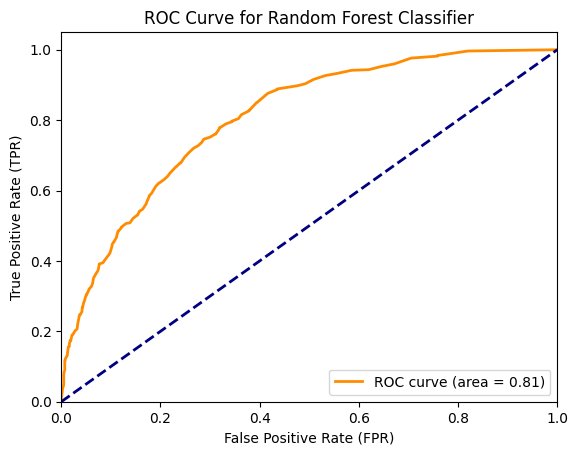

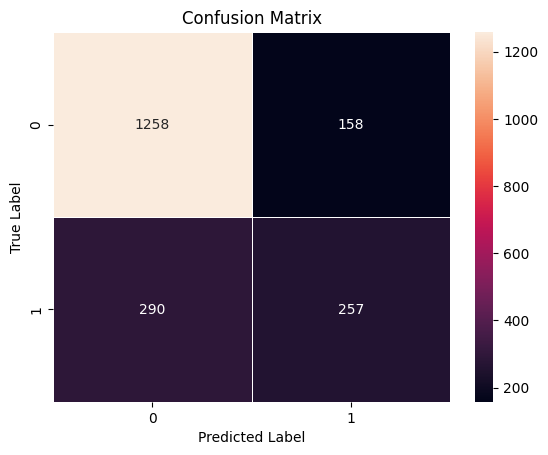

Accuracy: 0.7717778909831889
Confusion Matrix:
 [[1258  158]
 [ 290  257]]
F1 Score: 0.7612021099164838
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.89      0.85      1416
        True       0.62      0.47      0.53       547

    accuracy                           0.77      1963
   macro avg       0.72      0.68      0.69      1963
weighted avg       0.76      0.77      0.76      1963



In [180]:
decision_tree_classifier(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
xgboost_classifier(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_rounds=200)
random_forest_classifier(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_estimators=100)

In [181]:
from sklearn.model_selection import train_test_split



# Create a list for features to allow them to be easily commented out for tuning
features_to_include = (
[
       'tenure',
       'monthlycharges',
       # 'totalcharges',
       'encoded_multiplelines',
       'encoded_onlinesecurity',
       'encoded_onlinebackup',
       'encoded_deviceprotection',
       'encoded_techsupport',
       'encoded_streamingtv',
       'encoded_streamingmovies',
       'encoded_seniorcitizen',
       'encoded_partner',
       'encoded_dependents',
       'encoded_paperlessbilling',
    #    'encoded_phoneservice',
       'contract_month_to_month',
       'contract_one_year',
       'contract_two_year',
       'paymentmethod_bank_transfer_automatic',
       'paymentmethod_credit_card_automatic',
       'paymentmethod_electronic_check',
       'paymentmethod_mailed_check',
       # 'gender_female',
    #    'gender_male',
       'internetservice_dsl',
       'internetservice_fiber_optic',
       'internetservice_no'
       ])

# Separate features and target variable
X = (encoded_df[features_to_include])  # Features
y = encoded_df['encoded_churn']  # Target variable

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4580, 23)
X_test shape: (1963, 23)
y_train shape: (4580,)
y_test shape: (1963,)


<class 'pandas.core.frame.DataFrame'>
[1. 0. 0. ... 0. 0. 1.]
**************************************
*  SMOTE - Decision Tree Classifier  *
**************************************
Cannot plot ROC curve for binary values, probabilities are required



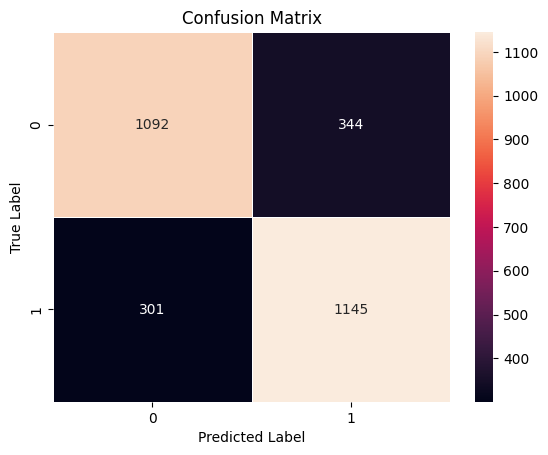

Accuracy: 0.7761970853573907

Confusion Matrix:
 [[1092  344]
 [ 301 1145]]

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.76      0.77      1436
        True       0.77      0.79      0.78      1446

    accuracy                           0.78      2882
   macro avg       0.78      0.78      0.78      2882
weighted avg       0.78      0.78      0.78      2882

********************************
*  SMOTE - XGBoost Classifier  *
********************************


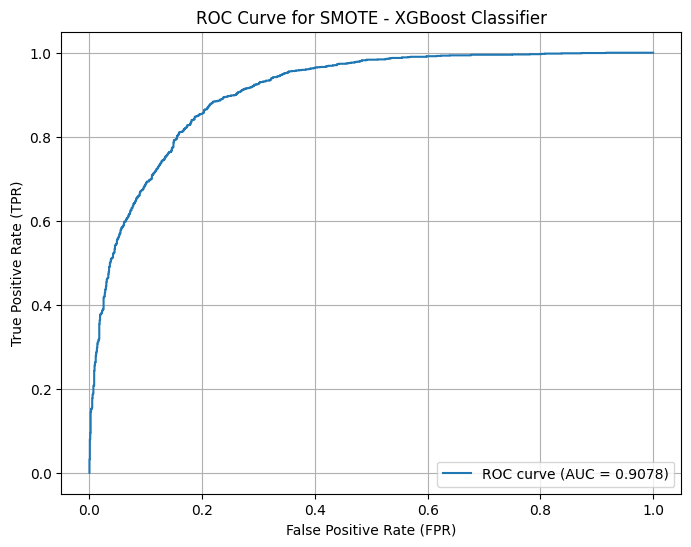

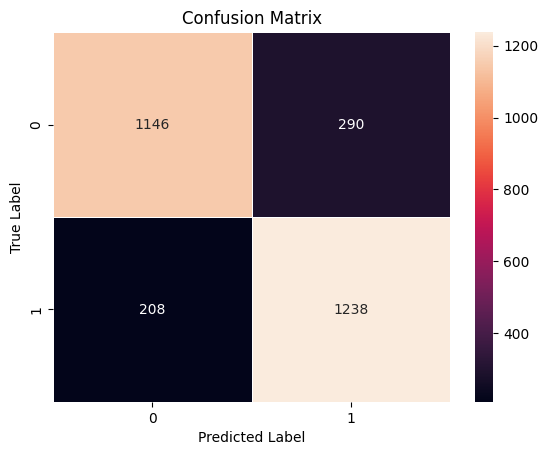

Accuracy: 0.8272033310201249
Confusion Matrix:
 [[1146  290]
 [ 208 1238]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.80      0.82      1436
        True       0.81      0.86      0.83      1446

    accuracy                           0.83      2882
   macro avg       0.83      0.83      0.83      2882
weighted avg       0.83      0.83      0.83      2882

**************************************
*  SMOTE - Random Forest Classifier  *
**************************************


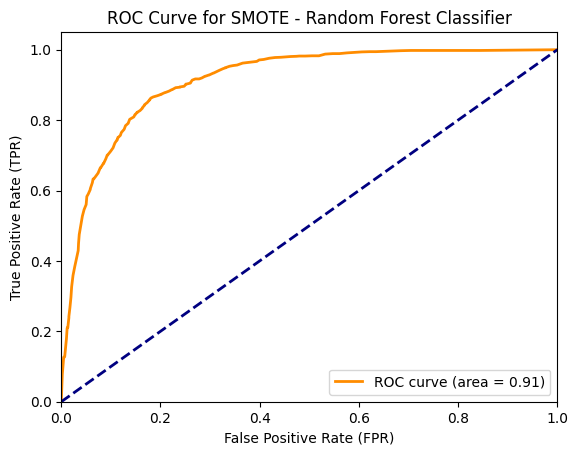

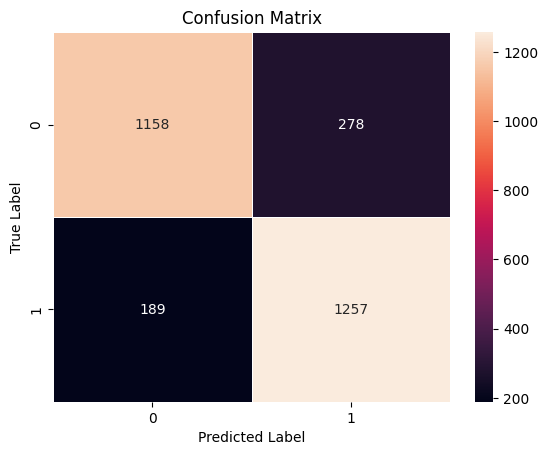

Accuracy: 0.8379597501734907
Confusion Matrix:
 [[1158  278]
 [ 189 1257]]
F1 Score: 0.8377876533228025
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.81      0.83      1436
        True       0.82      0.87      0.84      1446

    accuracy                           0.84      2882
   macro avg       0.84      0.84      0.84      2882
weighted avg       0.84      0.84      0.84      2882



In [182]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE before splitting into train/test to avoid data leakage
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

# Now split into train/test
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)



decision_tree_classifier(X_train=X_train_smote, y_train=y_train_smote, X_test=X_test_smote, y_test=y_test_smote, model_desc='SMOTE - Decision Tree Classifier')
xgboost_classifier(X_train=X_train_smote, y_train=y_train_smote, X_test=X_test_smote, y_test=y_test_smote, num_rounds=200, model_desc='SMOTE - XGBoost Classifier')
random_forest_classifier(X_train=X_train_smote, y_train=y_train_smote, X_test=X_test_smote, y_test=y_test_smote, num_estimators=100, model_desc='SMOTE - Random Forest Classifier')

# Biblography